### TASK 2:-

### Titanic Classification

Titanic Classification make a system which tells whether the person will be save from sinking. so, we use machine learnig model
on the titanic dataset to predict whether a passenger on the titanic would have survived or not.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:\\Users\\HP\\Downloads\\titanic.csv')

In [2]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

### Cleaning Data

In [4]:
df.drop(['PassengerId', 'Name','SibSp', 'Parch','Ticket','Cabin', 'Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
target=df.Survived
inputs=df.drop('Survived',axis='columns')

In [9]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [10]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [11]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


### Handling Null Values

In [12]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [13]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [14]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head(5)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [16]:
# finding the number of people pclass
inputs['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Data Visulaization

In [17]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

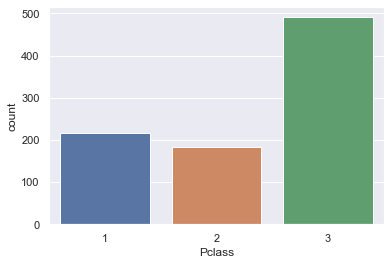

In [18]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=inputs)

In [20]:
inputs['female'].value_counts()

0    577
1    314
Name: female, dtype: int64

<AxesSubplot:xlabel='female', ylabel='count'>

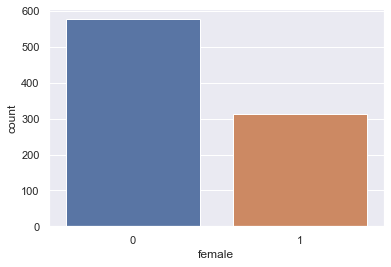

In [21]:
# making a count plot for "female" column
sns.countplot(x='female', data=inputs)

In [22]:
inputs['male'].value_counts()

1    577
0    314
Name: male, dtype: int64

<AxesSubplot:xlabel='male', ylabel='count'>

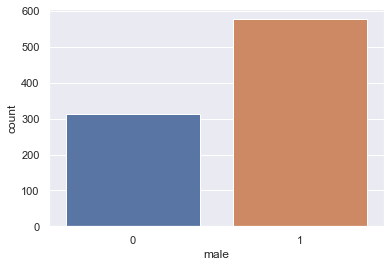

In [23]:
# making a count plot for "male" column
sns.countplot(x='male', data=inputs)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

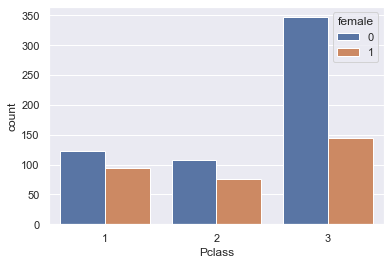

In [24]:
sns.countplot(x='Pclass', hue='female', data=inputs)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

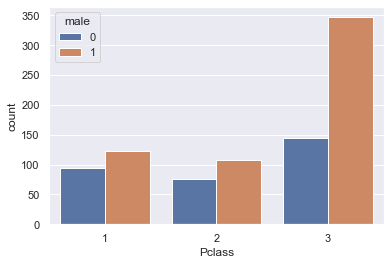

In [25]:
sns.countplot(x='Pclass', hue='male', data=inputs)

### Splitting the data into training data & Test data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [27]:
len(x_train)

712

In [28]:
len(x_test)

179

### Data Modeling

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
# training the Logistic Regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
# accuracy on training data
x_train_prediction = model.predict(x_train)

In [34]:
print(x_train_prediction)

[0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0
 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [36]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7949438202247191


In [37]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [38]:
model.fit(x_train,y_train)

GaussianNB()

In [39]:
model.score(x_test,y_test)

0.7932960893854749

In [40]:
x_test[:10]

,Pclass,Age,Fare,female,male
776,3,29.699118,7.7500,0,1
50,3,7.000000,39.6875,0,1
835,1,39.000000,83.1583,1,0
311,1,18.000000,262.3750,1,0
404,3,20.000000,8.6625,1,0
341,1,24.000000,263.0000,1,0
796,1,49.000000,25.9292,1,0
110,1,47.000000,52.0000,0,1
13,3,39.000000,31.2750,0,1
327,2,36.000000,13.0000,1,0


In [41]:
y_test[:10]

776    0
50     0
835    1
311    1
404    0
341    1
796    1
110    0
13     0
327    1
Name: Survived, dtype: int64

In [42]:
model.predict(x_test[:10])

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [43]:
model.predict_proba(x_test[:10])

array([[9.88353496e-01, 1.16465039e-02],
       [9.74370228e-01, 2.56297718e-02],
       [1.54020586e-03, 9.98459794e-01],
       [5.78288642e-11, 1.00000000e+00],
       [4.34975871e-02, 9.56502413e-01],
       [6.03871598e-11, 1.00000000e+00],
       [5.89839688e-03, 9.94101603e-01],
       [8.64429279e-01, 1.35570721e-01],
       [9.87746762e-01, 1.22532383e-02],
       [2.44245555e-02, 9.75575445e-01]])